# Lineal Regresion

## Key formulas

**y = mx1 + b**

**y = mx1 + mx2 + mx3 + ... + mxn + b**

AE (Absolute Error) = |y - predict|

MAE (Mean Absolute Error) = (1/N) * Σ | yi - ŷi |   ,  i=1 hasta N


In [9]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

# ==============================
# Cargar dataset
# ==============================
house_prices_ds = pd.read_csv('../../../datasets/raw/hyderabad_house_price_processed.csv')

# Usamos y=Price y features=["Area"]
X = house_prices_ds[["Area"]].dropna().values  # (n,1)
y = house_prices_ds["Price"].dropna().values   # (n,)



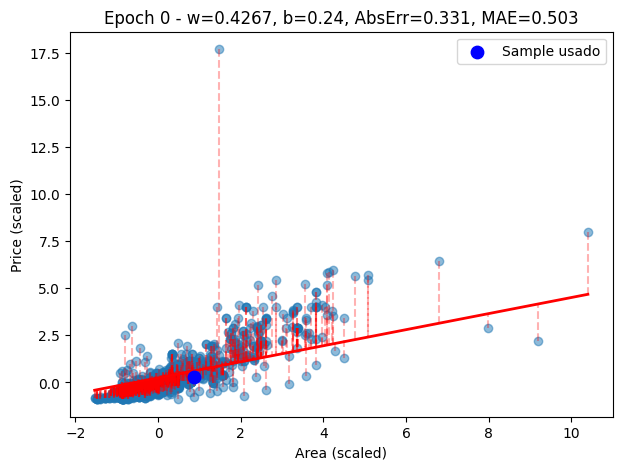


Resultado final:
w=0.684138554809897, b=-0.027520433677293732


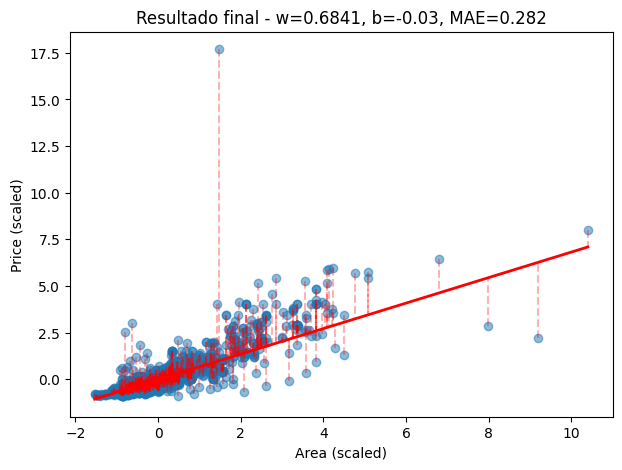

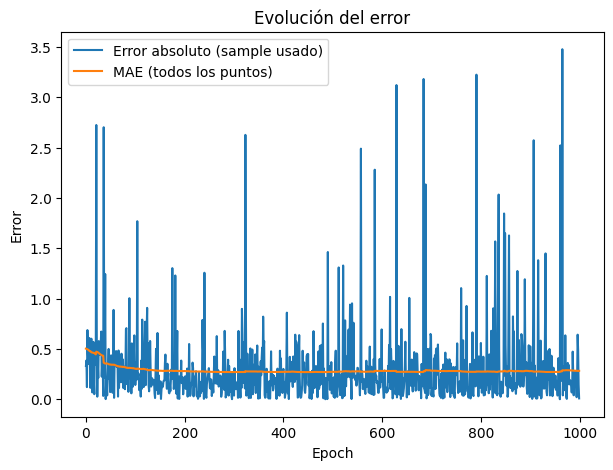

In [10]:

def draw_line(slope, intercept, color="grey", linewidth=0.7, starting=None, ending=None):
    if starting is None: 
        starting = X.min()
    if ending is None:
        ending = X.max()
    xs = np.linspace(starting, ending, 200)
    plt.plot(xs, intercept + slope*xs, linestyle="-", color=color, linewidth=linewidth)

def plot_points():
    plt.scatter(X.ravel(), y, alpha=0.5)
    plt.xlabel("Area (scaled)")
    plt.ylabel("Price (scaled)")

def plot_residuals(w, b, X, y, color="red"):
    for xi, yi in zip(X.ravel(), y):
        y_pred = w * xi + b
        plt.plot([xi, xi], [yi, y_pred], linestyle="--", color=color, alpha=0.3)

# ==============================
# Square trick
# ==============================
def square_trick(b, w, feature, label, lr):
    prediction = w * feature + b
    error = label - prediction
    b += lr * error
    w += lr * error * feature
    return w, b, error

# ==============================
# Entrenamiento interactivo
# ==============================
def linear_regression_interactive(X, y, lr=0.01, epochs=30):
    w = random.random()
    b = random.random()
    history = []
    errors_abs = []
    mae_history = []

    epoch = 0
    auto = False
    skip_graphs = False

    while epoch < epochs:
        # Avanza un paso de entrenamiento
        i = random.randint(0, len(X)-1)
        xi = X[i][0]
        yi = y[i]
        w, b, error = square_trick(b, w, xi, yi, lr)
        history.append((w, b, xi, yi))
        errors_abs.append(abs(error))

        y_pred_all = w * X.ravel() + b
        mae = np.mean(np.abs(y - y_pred_all))
        mae_history.append(mae)

        # Dibujar solo si no se pidió "end"
        if not skip_graphs:
            plt.figure(figsize=(7,5))
            plot_points()

            for (wj, bj, _, _) in history[:-1]:
                draw_line(wj, bj, color="lightgrey", linewidth=0.7)

            draw_line(w, b, color="red", linewidth=2)
            plt.scatter(xi, yi, color="blue", s=80, zorder=5, label="Sample usado")
            plot_residuals(w, b, X, y, color="red")

            plt.legend()
            plt.title(f"Epoch {epoch} - w={w:.4f}, b={b:.2f}, AbsErr={errors_abs[-1]:.3f}, MAE={mae:.3f}")
            plt.show()

        epoch += 1

        # Pedir acción solo si no estamos en auto-run ni en skip
        if not auto and not skip_graphs and epoch < epochs:
            action = input("👉 Ingresa 'next' para 1 paso, un número para varios, 'end' para ir directo al final: ")
            if action.strip().lower() == "end":
                skip_graphs = True
            elif action.strip().lower() == "next":
                continue
            elif action.strip().isdigit():
                steps = int(action.strip())
                for _ in range(steps-1):  # ya hicimos uno
                    if epoch >= epochs: break
                    i = random.randint(0, len(X)-1)
                    xi = X[i][0]
                    yi = y[i]
                    w, b, error = square_trick(b, w, xi, yi, lr)
                    history.append((w, b, xi, yi))
                    errors_abs.append(abs(error))
                    y_pred_all = w * X.ravel() + b
                    mae = np.mean(np.abs(y - y_pred_all))
                    mae_history.append(mae)
                    epoch += 1

    # ==============================
    # Final
    # ==============================
    print("\nResultado final:")
    print(f"w={w}, b={b}")

    # Línea final
    plt.figure(figsize=(7,5))
    plot_points()
    draw_line(w, b, color="red", linewidth=2)
    plot_residuals(w, b, X, y, color="red")
    plt.title(f"Resultado final - w={w:.4f}, b={b:.2f}, MAE={mae_history[-1]:.3f}")
    plt.show()

    # Errores
    plt.figure(figsize=(7,5))
    plt.plot(errors_abs, label="Error absoluto (sample usado)")
    plt.plot(mae_history, label="MAE (todos los puntos)")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Evolución del error")
    plt.legend()
    plt.show()

    return w, b, errors_abs, mae_history

# ==============================
# Ejecutar
# ==============================
w, b, errors_abs, mae_history = linear_regression_interactive(X, y, lr=0.01, epochs=1000)
